## Micrograd by Andrej Karpathy

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
print(f(3.0))

20.0


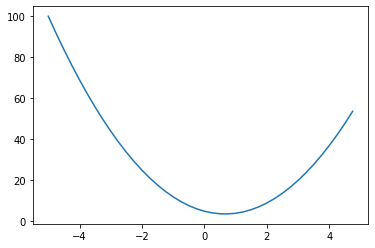

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

### Simple derivative

In [5]:
h = 0.0001
x = 3.0
#Then by definition of derivative
(f(x + h) - f(x)) / h 

14.000300000063248

In [6]:
h = 0.0001
x = -3.0
#Then by definition of derivative
(f(x + h) - f(x)) / h 

-21.999700000066014

In [7]:
#Let's do more complex stuff
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [8]:
h = 0.0001

#Inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a * b + c
a += h
d2 = a * b + c
print(f"D1 is {d1} D2 is {d2} and slope is {(d2 - d1) / h}")

D1 is 4.0 D2 is 3.999699999999999 and slope is -3.000000000010772


### Value Class

In [9]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [10]:
print(d._prev)
print(d._op)

{Value(data=10.0), Value(data=-6.0)}
+


In [11]:
# pip install graphviz
from graphviz import Digraph

### Draw Graph using GraphViz

In [12]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.04f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

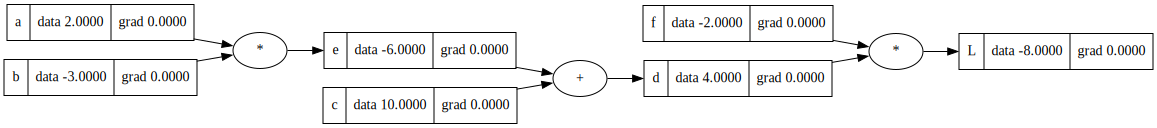

In [13]:
draw_dot(L)

L = d * f

dL / dd =? f

(f(x + h) - f(x)) / h

((d + h)*f - d*f) / h

(d*f + h*f - d*f) / h

(h*f)/h

f

dd / dc = ?

d = c + e

(f(x + h) - f(x)) / h as definition of derivative

((c + h + e) - (c + e)) / h

(c + h + e - c - e) / h

h/h

1.0

So by symmetry also => dd / de = 1.0

But our target is dL / dc ? dL / dd times dd / dc - Calculus chain rule

We know dL / dd and dd / dc ...

### Manually set after checking

In [ ]:
f.grad = 4.0
d.grad = -2.0

In [ ]:
# Staging area
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print((L2 - L1) / h)
lol()